## Penguin Cytochrome B investigation in collaboration with Dr. X, Awesome University

#### Written By: Abby Schaefer, Iowa State University, November 25, 2019

This is my Python assignment for BCB546X! I am going to start out by importing some functions and packages.

In [1]:
from Bio import SeqIO

In [2]:
from Bio.Data import CodonTable

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

In [5]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

I know I need to read in the .csv file Dr. X gave me in order to add columns to it.

In [6]:
penguins_df = pd.read_csv("penguins_mass.csv")

In [7]:
penguins_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


### Function 1. Get DNA from a FastA file

The following gets sequences from the file Dr. X provided.

In [8]:
def get_sequences_from_file(fasta_fn):
    """
    Description: gets sequences from a fasta file
    
    Parameters: 
        fasta_fn: the file you want to extract sequences from
        
    Return: the dictionary containing the sequences from the file
    """
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [9]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
species_list = list(penguins_df.species)

In [10]:
cytb_seqs

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

The following prases ONLY the sequences and none of the metadata.

In [11]:
handle = open("penguins_cytb.fasta", "r") 
seq_list = list(SeqIO.parse(handle, "fasta"))
handle.close()
print(seq_list[0].seq)

ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCA

In [12]:
species_list

['Aptenodytes forsteri',
 'Aptenodytes patagonicus',
 'Eudyptes chrysocome',
 'Eudyptes chrysolophus',
 'Eudyptes sclateri',
 'Eudyptula minor',
 'Pygoscelis adeliae',
 'Pygoscelis antarctica',
 'Pygoscelis papua',
 'Spheniscus demersus',
 'Spheniscus humboldti',
 'Spheniscus magellanicus']

### Function 2. Translate DNA to Protein

In [13]:
def translate_function(string_nucleotides): 
    """
    Description: translate a string of nucleotides into the amino acid sequence
    
    Parameters:
        string_nucleotides: the string of DNA bases that you want to translate
        
    Return: the translated amino acid sequence
    """
    DNA_string=str(string_nucleotides)
    aminoacids=""
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    for i in range(0, len(DNA_string))[::3]:
        codon = DNA_string[i:i+3]
        if codon in ["TAA", "AGA", "AGG", "TAG"]:
            break

        aa = mito_table.forward_table[codon]
        aminoacids = aminoacids + aa
    aa_seq = Seq(aminoacids)
    aa_seq.alphabet=IUPAC.protein
    return(aa_seq)

Checking the mito_table output shows that this is essentially a dictionary, with each codon specifying an amino acid.

In [14]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

If I ask the mito_table which amino acid "TTT" codes for, I will get "F".

In [15]:
mito_table.forward_table["TTT"]

'F'

From Biopython tutorial and cookbook (http://biopython.org/DIST/docs/tutorial/Tutorial.html), I found a test sequence for my functions. I expect the result to be "Seq('MAIVMGRWKGAR', IUPACProtein())"

In [16]:
test_seq=Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')
translate_function(test_seq)

Seq('MAIVMGRWKGAR', IUPACProtein())

### Function 3. Alternative to Function 2 using BioPython

In [17]:
def alt_translate(string_nucleotides):
    """
    Description: translate a string of nucleotides into the amino acid sequence using BioPython!!
    
    Parameters:
        string_nucleotides: the string of DNA bases that you want to translate
        
    Return: the translated amino acid sequence
    """
    DNAseq=Seq(str(string_nucleotides), IUPAC.unambiguous_dna)
    protein=DNAseq.translate(to_stop=True, table="Vertebrate Mitochondrial")
    return(protein)

Using my test_seq, I expect the same result.

In [18]:
alt_translate(test_seq)

Seq('MAIVMGRWKGAR', IUPACProtein())

### Function 4. Calculate the Molecular Weight of each cytochrome B protein

Note that I first check that the object (aa_seq) being passed to this function is a string.

In [19]:
def get_mw(aa_seq):
    """
    Description: Calculate the molecular weight of a protein
    
    Parameters:
        aa_seq: the string of AAs you want to get the MW for
        
    Return: the molecular weight in g/mol
    """
    aa_seq = str(aa_seq)
    analysed_seq=ProteinAnalysis(aa_seq)
    return(analysed_seq.molecular_weight())

I will get the MW of the protein my test_seq encodes for.

In [20]:
test_protein = alt_translate(test_seq)
get_mw(test_protein)

1375.7078999999999

And also the MW of a known protein. I expect 17103.1617 g/mol.

In [21]:
test_protein = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV" #from BioPython wiki example
get_mw(test_protein)

17103.1617

### Function 5. Get the GC content of a DNA sequence

In [22]:
def get_GC(string_nucleotides):
    """
    Description: Calculate the GC content of a DNA sequence
    
    Parameters:
        string_nucleotides: the string of DNA bases you want to get the GC Content for
        
    Return: the GC content as a percent
    """
    return(100*(string_nucleotides.count("C")+string_nucleotides.count("G"))/(len(string_nucleotides)))

Test the function on my test_seq.

In [23]:
get_GC(test_seq)

56.41025641025641

### Main script for this analysis

I first use a for loop to create blank columns in the penguins dataframe.

In [24]:
for index, row in penguins_df.iterrows():
    penguins_df.loc[index, 'MW']=''
    penguins_df.loc[index, 'GC']=''
penguins_df

,species,mass,MW,GC
0,Aptenodytes forsteri,28.00,,
1,Aptenodytes patagonicus,13.40,,
2,Eudyptes chrysocome,2.80,,
3,Eudyptes chrysolophus,4.50,,
4,Eudyptes sclateri,4.25,,
5,Eudyptula minor,1.60,,
6,Pygoscelis adeliae,4.60,,
7,Pygoscelis antarctica,4.10,,
8,Pygoscelis papua,6.10,,
9,Spheniscus demersus,3.20,,


I use another nest for loop to use the functions I wrote to add data to the dataframe.

In [25]:
for key, value in cytb_seqs.items():
    aa_seq=alt_translate(value)
    mw=get_mw(aa_seq)
    gc=get_GC(value)
    for index, row in penguins_df.iterrows():
        if penguins_df.loc[index, "species"]==key:
                penguins_df.loc[index, "GC"]=gc
                penguins_df.loc[index, "MW"]=mw
penguins_df

,species,mass,MW,GC
0,Aptenodytes forsteri,28.00,42459.6,48.3815
1,Aptenodytes patagonicus,13.40,42563.7,49.6938
2,Eudyptes chrysocome,2.80,42475.6,51.1811
3,Eudyptes chrysolophus,4.50,42445.5,50.9186
4,Eudyptes sclateri,4.25,42475.6,50.8311
5,Eudyptula minor,1.60,42491.6,49.2563
6,Pygoscelis adeliae,4.60,42458.6,49.0814
7,Pygoscelis antarctica,4.10,42404.5,47.769
8,Pygoscelis papua,6.10,42595.9,47.1566
9,Spheniscus demersus,3.20,42431.5,48.294


Now for the plotting.

In [26]:
%matplotlib inline

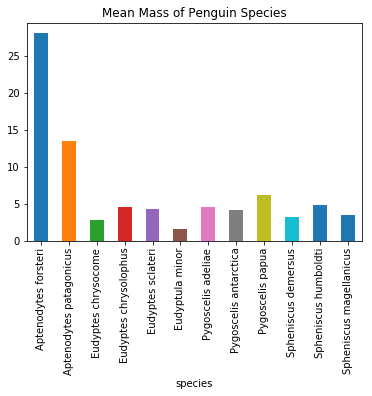

In [27]:
penguins_df.groupby('species')["mass"].describe()['mean'].plot(kind="bar", title = "Mean Mass of Penguin Species")

The smallest penguin by body mass is Eudyptula minor. This is interesting because its name literally means "little penguin."

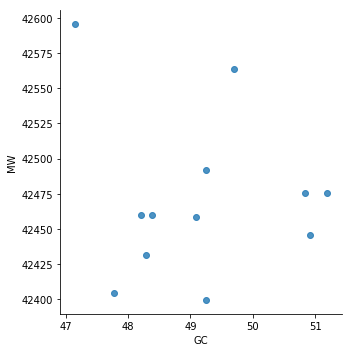

In [28]:
sns.lmplot("GC", "MW", data=penguins_df, fit_reg=False)

GC content and molecular weight do not appear to be correlated.

My lab is interested in expressing and purifying the cytochrome B protein. Isoelectric point is a useful bit of information for protein purification. The next section shows how I calculated the isoelectric point for each penguin cytochrome B.

In [29]:
for index, row in penguins_df.iterrows():
    penguins_df.loc[index, 'IP']=''
penguins_df

,species,mass,MW,GC,IP
0,Aptenodytes forsteri,28.00,42459.6,48.3815,
1,Aptenodytes patagonicus,13.40,42563.7,49.6938,
2,Eudyptes chrysocome,2.80,42475.6,51.1811,
3,Eudyptes chrysolophus,4.50,42445.5,50.9186,
4,Eudyptes sclateri,4.25,42475.6,50.8311,
5,Eudyptula minor,1.60,42491.6,49.2563,
6,Pygoscelis adeliae,4.60,42458.6,49.0814,
7,Pygoscelis antarctica,4.10,42404.5,47.769,
8,Pygoscelis papua,6.10,42595.9,47.1566,
9,Spheniscus demersus,3.20,42431.5,48.294,


In [30]:
def get_IP(aa_seq):
    """
    Description: Calculate the isoelectric point of a protein
    
    Parameters:
        aa_seq: the string of AAs you want to get the isoelectric point for
        
    Return: the isoelectric point as a pH
    """
    aa_seq = str(aa_seq)
    analysed_seq=ProteinAnalysis(aa_seq)
    return(analysed_seq.isoelectric_point())

In [31]:
for key, value in cytb_seqs.items():
    aa_seq=alt_translate(value)
    ip = get_IP(aa_seq)
    for index, row in penguins_df.iterrows():
        if penguins_df.loc[index, "species"]==key:
                penguins_df.loc[index, "IP"]=ip
penguins_df

,species,mass,MW,GC,IP
0,Aptenodytes forsteri,28.00,42459.6,48.3815,9.0506
1,Aptenodytes patagonicus,13.40,42563.7,49.6938,9.0506
2,Eudyptes chrysocome,2.80,42475.6,51.1811,9.0506
3,Eudyptes chrysolophus,4.50,42445.5,50.9186,9.0506
4,Eudyptes sclateri,4.25,42475.6,50.8311,9.0506
5,Eudyptula minor,1.60,42491.6,49.2563,9.0506
6,Pygoscelis adeliae,4.60,42458.6,49.0814,8.8869
7,Pygoscelis antarctica,4.10,42404.5,47.769,8.69733
8,Pygoscelis papua,6.10,42595.9,47.1566,9.16901
9,Spheniscus demersus,3.20,42431.5,48.294,9.0506


Finally, I saved the results of this analysis to a .csv file.

In [32]:
penguins_df.to_csv("penguins_mass_cytb.csv")